In [124]:
import numpy as np
import matplotlib.pyplot as plt
from hw3_utils import log_opt_return_sample as sample
from projToSmplx import projToSmplx

In [134]:
R_emp = sample(int(1e5)).T
n = 10

def obj(x, R, lambd):
    """
    Objective function for the optimization problem.
    """
    return np.mean(np.log(R @ x)) - lambd/2 * np.dot(x, x)


In [142]:
def subgrad(x, r, lambd):
    return -np.divide(r, r.T@x + 1e-10) + lambd*x


def stoch_subgrad_a(n, R, a, lambd, noise, steps = 100):
    """
    Stochastic subgradient method for the optimization problem.
    """
    x = np.ndarray((steps+1, n))
    x[0,:] = np.zeros(n)
    for i in range(steps):
        # sample r
        r = R[i]

        # get subgradient
        g = subgrad(x[i,:], r, lambd) + np.random.normal(0,noise,n)

        # update x
        x[i+1,:] = x[i,:] - a*g

        # project x
        x[i+1,:] = projToSmplx(x[i+1,:])
    return x


def stoch_subgrad_b(n, R, a, lambd, noise, steps = 100):
    """
    Stochastic subgradient method for the optimization problem.
    """
    x = np.ndarray((steps+1, n))
    x[0,:] = np.zeros(n)
    for i in range(steps):
        # sample r
        r = R[i]

        # get subgradient
        g = subgrad(x[i,:], r, lambd) + np.random.normal(0,noise,n)

        # update x
        x[i+1,:] = x[i,:] - a*g

        # project x
        x[i+1,:] = np.max([x[i+1,:], np.zeros(n)], axis=0)
    return x

In [145]:
steps = int(1000)
x1a = stoch_subgrad_a(n, R_emp, a = 0.01, lambd = 0.1, noise = 1, steps = steps)
x10a = stoch_subgrad_a(n, R_emp, a = 0.01, lambd = 10, noise = 1, steps = steps)
objective1a = np.array([obj(x1a[i,:], R_emp, 0.1) for i in range(steps)])
objective10a = np.array([obj(x10a[i,:], R_emp, 10) for i in range(steps)])

/tmp/ipykernel_1589404/1237031172.py:8: RuntimeWarning: divide by zero encountered in log
  return np.mean(np.log(R @ x)) - lambd/2 * np.dot(x, x)


In [143]:
x1b = stoch_subgrad_b(n, R_emp, a = 0.01, lambd = 0.1, noise = 1, steps = steps)
x10b = stoch_subgrad_b(n, R_emp, a = 0.01, lambd = 10, noise = 1, steps = steps)
objective1b = np.array([obj(x1b[i,:], R_emp, 0.1) for i in range(steps)])
objective10b = np.array([obj(x10b[i,:], R_emp, 10) for i in range(steps)])

/tmp/ipykernel_1589404/1237031172.py:8: RuntimeWarning: divide by zero encountered in log
  return np.mean(np.log(R @ x)) - lambd/2 * np.dot(x, x)


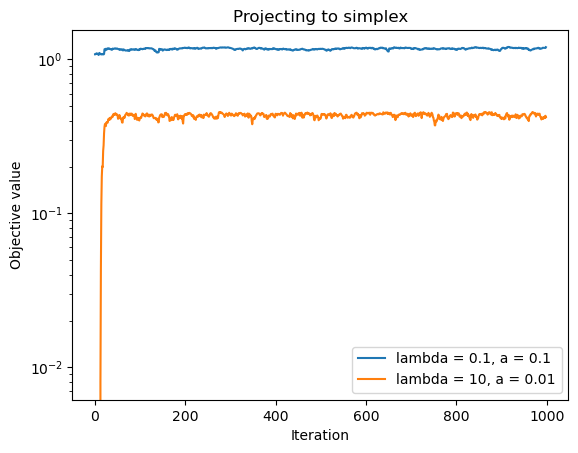

In [153]:
fig, ax = plt.subplots()
ax.plot(objective1a[1:], label = 'lambda = 0.1, a = 0.1')
ax.plot(objective10a[1:], label = 'lambda = 10, a = 0.01')
ax.set(xlabel='Iteration', ylabel='Objective value',
       title='Projecting to simplex',
       yscale = 'log')
ax.legend()
plt.show()


In [147]:
x1b = stoch_subgrad_b(n, R_emp, a = 0.01, lambd = 0.1, noise = 1, steps = steps)
x10b = stoch_subgrad_b(n, R_emp, a = 0.01, lambd = 10, noise = 1, steps = steps)
objective1b = np.array([obj(x1b[i,:], R_emp, 0.1) for i in range(steps)])
objective10b = np.array([obj(x10b[i,:], R_emp, 10) for i in range(steps)])

/tmp/ipykernel_1589404/1237031172.py:8: RuntimeWarning: divide by zero encountered in log
  return np.mean(np.log(R @ x)) - lambd/2 * np.dot(x, x)


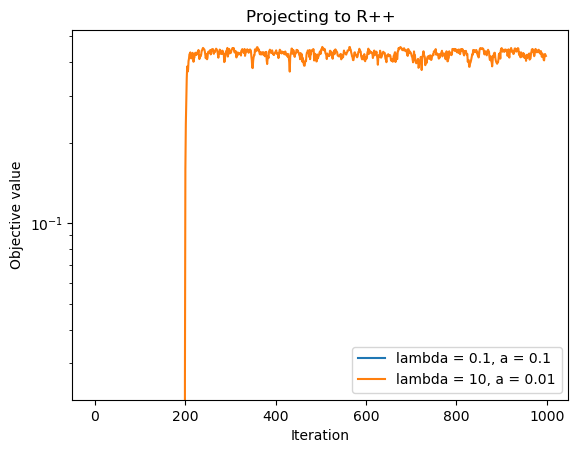

In [152]:
fig, ax = plt.subplots()
ax.plot(objective1b[1:], label = 'lambda = 0.1, a = 0.1')
ax.plot(objective10b[1:], label = 'lambda = 10, a = 0.01')
ax.set(xlabel='Iteration', 
       ylabel='Objective value',
       title='Projecting to R++',
       yscale = 'log')
ax.legend()
plt.show()


In [139]:
obj1_robust = np.array([obj(x1[-1,:], R_emp[i], 0.1) for i in range(len(R_emp))])
obj10_robust = np.array([obj(x10[-1,:], R_emp[i], 10) for i in range(len(R_emp))])

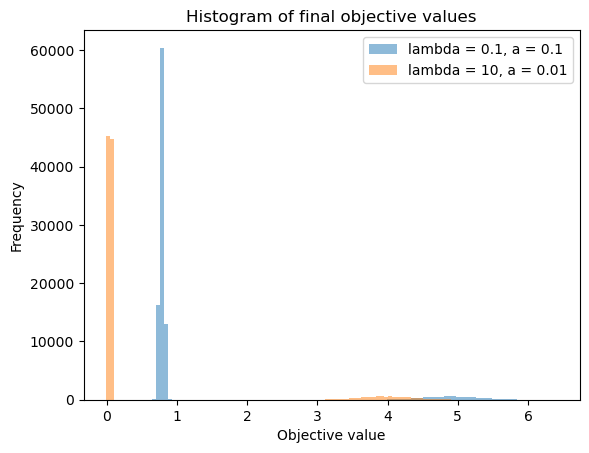

In [141]:
fig, ax = plt.subplots()
ax.hist(obj1_robust, bins = 100, alpha = 0.5, label = 'lambda = 0.1, a = 0.1')
ax.hist(obj10_robust, bins = 100, alpha = 0.5, label = 'lambda = 10, a = 0.01')
ax.set(xlabel='Objective value', ylabel='Frequency',
       title='Histogram of final objective values')
ax.legend()
